In [1]:
import numpy as np
from numba import jit

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipywidgets as ipy

import numpy.random as rd

# TP4

## Exercício 1

In [2]:
# Import the data from the text file
fileName = "velocities.txt"
data = np.loadtxt(fileName,float)
t = data[:,0]
v = data[:,1]

In [3]:
# Alínea 1

# Integrator using trapezoidal rule, given the data as arrays
def integrate_trapezoidal_data(x_array, y_array):
    h = (x_array[-1] - x_array[0])/(x_array.size-1) # Separation
    return h*(0.5*(y_array[0]+y_array[-1]) + np.sum(y_array[1:-1]))

print(integrate_trapezoidal_data(t,v))

8.218923999999998


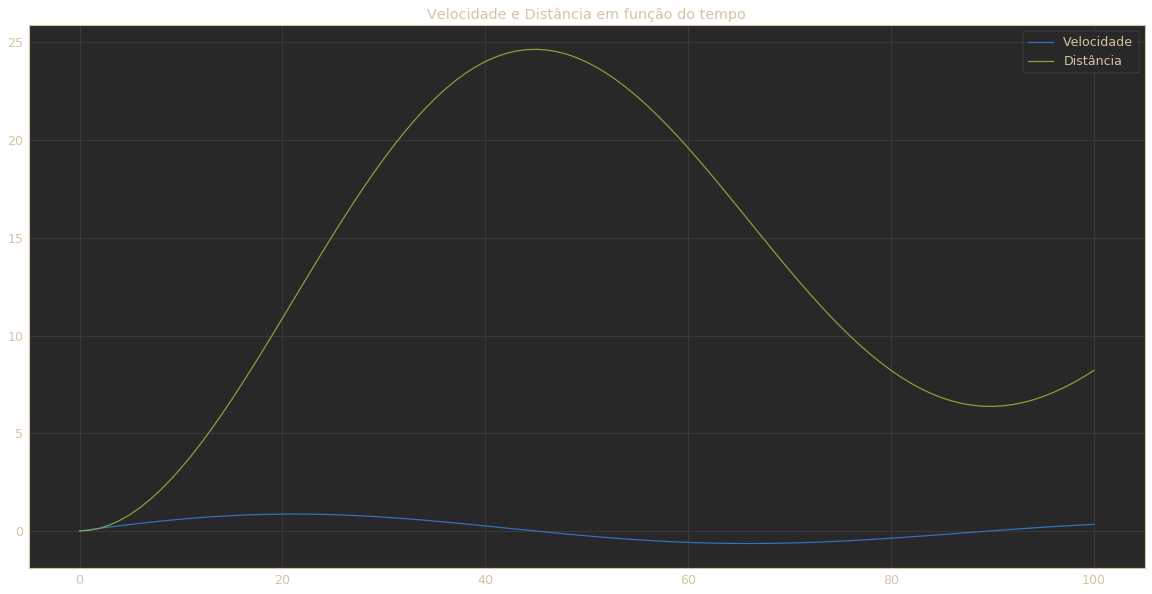

In [4]:
# Alínea 2

# Distance as a function of time
x = np.empty(t.shape)
for i in range(1,t.size):
    x[i] = integrate_trapezoidal_data(t[0:i+1],v[0:i+1])

x[0] = 0

# Draw the graph
plt.figure(figsize = (20,10))
plt.plot(t,v,label="Velocidade")
plt.plot(t,x,label="Distância")
plt.title("Velocidade e Distância em função do tempo")
plt.legend()
plt.show()

## Exercício 2

In [5]:
# Simpson's Rule Integral
# f must be vectorized, N must be even
def integrate_simpson(f, minValue, maxValue, N):
    arr = np.linspace(minValue, maxValue, N+1) # N+1 points for N intervals
    h = (maxValue-minValue)/N
    return (1.0/3.0)*h*(f(minValue) + f(maxValue) + 4*np.sum(f(arr[1:-1:2])) + 2*np.sum(f(arr[2:-1:2])))

# Trapezoidal Rule Integral
# f must be vectorized
def integrate_trapezoidal(f, minValue, maxValue, N):
    arr = np.linspace(minValue, maxValue, N+1) # N+1 points for N intervals
    h = (maxValue-minValue)/N
    return h*(0.5*(f(arr[0]) + f(arr[-1])) + np.sum(f(arr[1:-1])))


In [6]:
# Alínea 1 e 2

# Function to integrate (vectorized)
def func(x):
    return x**4-2*x+1

teorico = 1.0/5.0 * 2**5  - 2**2 + 2
numerico1_simpson = integrate_simpson(func,0,2,10)

print("Valor Teórico: ",teorico)
print("Valor numérico: ",numerico1_simpson)
print("Erro: ", np.abs(teorico - numerico1_simpson)/teorico * 100, "%")

Valor Teórico:  4.4
Valor numérico:  4.400426666666667
Erro:  0.009696969696972665 %


In [7]:
# Alínea 3

# N = 100
numerico2_simpson = integrate_simpson(func,0,2,100)
numerico2_trap = integrate_trapezoidal(func,0,2,100)
print("N = 100")
print("\tValor Teórico: ",teorico)
print("\tValor numérico: ",numerico2_simpson)
print("\tValor numérico trapezoidal: ",numerico2_trap)
print("\tErro simpson: ", np.abs(teorico - numerico2_simpson)/teorico * 100, "%")
print("\tErro trapezoidal: ", np.abs(teorico - numerico2_trap)/teorico * 100, "%")

# N = 1000
numerico3_simpson = integrate_simpson(func,0,2,1000)
numerico3_trap = integrate_trapezoidal(func,0,2,1000)
print("N = 1000")
print("\tValor Teórico: ",teorico)
print("\tValor numérico: ",numerico3_simpson)
print("\tValor numérico trapezoidal: ",numerico3_trap)
print("\tErro simpson: ", np.abs(teorico - numerico3_simpson)/teorico * 100, "%")
print("\tErro trapezoidal: ", np.abs(teorico - numerico3_trap)/teorico * 100, "%")

N = 100
	Valor Teórico:  4.4
	Valor numérico:  4.400000042666667
	Valor numérico trapezoidal:  4.401066656
	Erro simpson:  9.69696969186564e-07 %
	Erro trapezoidal:  0.024242181818179272 %
N = 1000
	Valor Teórico:  4.4
	Valor numérico:  4.400000000004267
	Valor numérico trapezoidal:  4.400010666665601
	Erro simpson:  9.697293473271367e-11 %
	Erro trapezoidal:  0.0002424242181947084 %


## Exercício 3

In [8]:
# Alínea 1

def test(x):
    return np.exp(-x**2)

print(integrate_simpson(test,0,3,int(3/0.1)))

0.8862073362266246


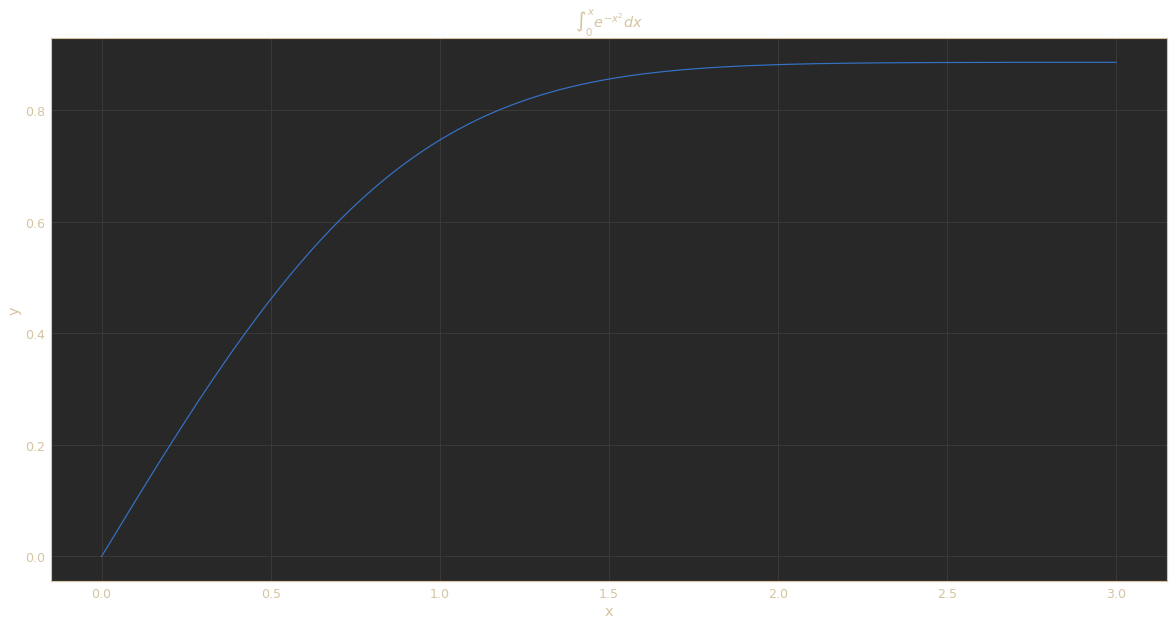

In [9]:
# Alínea 2

def graph_integral(x):
    return integrate_simpson(test,0,x,30)

# Draw the graph
x_arr = np.arange(0,3,0.001)
y_arr = np.vectorize(graph_integral)(x_arr)

plt.figure(figsize=(20,10))
plt.plot(x_arr,y_arr)
plt.title("$\int_{0}^{x} e^{-x^2} dx$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Exercício 4

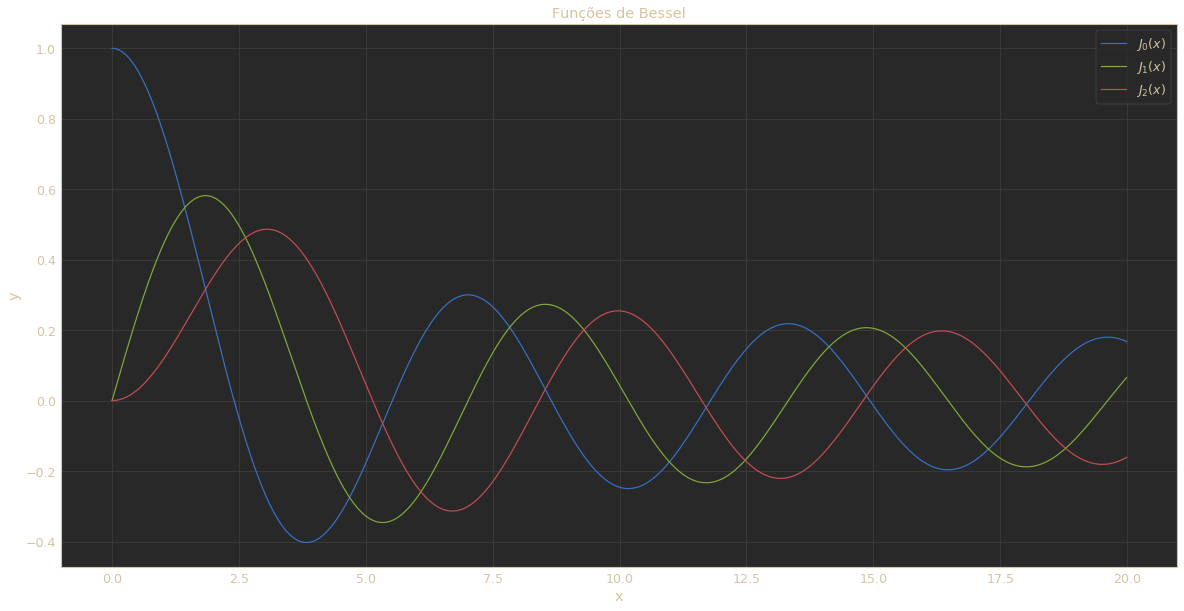

In [10]:
# Alínea 1

def J(m,x):
    return 1/np.pi * integrate_simpson(lambda theta: np.cos(m*theta-x*np.sin(theta)),0,np.pi,1000)

x_arr = np.arange(0,20,0.01)
y0_arr = np.vectorize(lambda x: J(0,x))(x_arr)
y1_arr = np.vectorize(lambda x: J(1,x))(x_arr)
y2_arr = np.vectorize(lambda x: J(2,x))(x_arr)

plt.figure(figsize=(20,10))
plt.plot(x_arr,y0_arr,label="$J_0(x)$")
plt.plot(x_arr,y1_arr,label="$J_1(x)$")
plt.plot(x_arr,y2_arr,label="$J_2(x)$")
plt.title("Funções de Bessel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

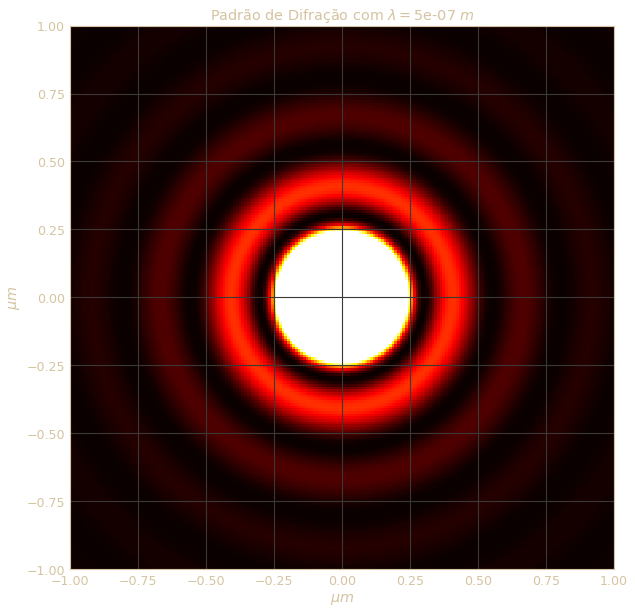

In [11]:
# Alínea 2

# Distance to origin
def distance(x,y):
    return np.sqrt(x**2+y**2)

# Create a grid with the distances to each point in the plane
side = 101 # Must be odd
maxrange = 1e-6 # Range of the square
matrixSide = side*2+1
multiplier = maxrange/side

distMatr = np.zeros((matrixSide,matrixSide),float)
for x in range(matrixSide):
    for y in range(matrixSide):
        distMatr[y,x] = distance((y-side)*multiplier,(x-side)*multiplier)

# Remove the origin
distMatr[side,side] = multiplier # Just a random value, it doesn't really matter as long as it's not 0
        
# Values
wavelenght = 500e-9
k = 2*np.pi/wavelenght
maxValue = 0.01

# Calculate
disp = np.vectorize(lambda r: (J(1,k*r)/(k*r))**2 )(distMatr) # This is probably the costly step, ideally the integrator would be correctly vectorized, WIP
disp[side,side] = maxValue

# Draw the graph
plt.figure(figsize=(20,10))
plt.hot()
extent = side*multiplier*10**6
plt.imshow(disp.T,origin="lower",vmax=maxValue,extent=[-extent,extent,-extent,extent])
plt.xlabel("$\mu m$")
plt.ylabel("$\mu m$")
plt.title("Padrão de Difração com $\lambda = $"+str(wavelenght)+" $m$")
plt.show()